# KMEAN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


from numpy import unique
from numpy import where

In [2]:
import warnings

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Disable warnings
warnings.simplefilter("ignore")

# 1. Data Preparation

## 1.1 Load the data

In [3]:
try:
    data = pd.read_csv('../../datasets/AimoScoreWeakLinks.csv')
    data = data.drop(columns=['Unnamed: 0', 'AimoScore'])
except IOError as e:
    print(e)

## 1.2

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

In [7]:
from sklearn.cluster import KMeans
data = X.values
model = KMeans(n_clusters=14)
model.fit(data)

labels = model.labels_
centroids = model.cluster_centers_
print(labels)

[ 7  9  7 ... 13  8  0]


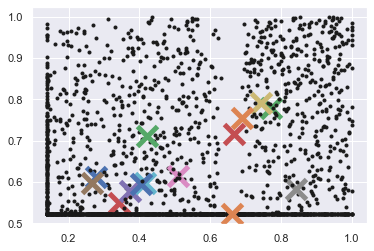

In [6]:
for i in range(14):
    datapoints = data[np.where(labels==i)]
    plt.plot(datapoints[:,3],datapoints[:,4],'k.')
    centers = plt.plot(centroids[i,3],centroids[i,4],'x')
    plt.setp(centers,markersize=20.0)
    plt.setp(centers,markeredgewidth=5.0)
plt.show()